https://www.kaggle.com/brendan45774/chess-piece-dectection

**Machine Vision**

**Mini Project**

Members : 

16. Zenil Gosher

17. Parth Gujar

24. Jayesh Jain


In [3]:
!pip install imageai

In [4]:
import numpy as np
import os
import shutil
from pathlib import Path

## Data Preparation

In [5]:
root_annots_path = 'annotations/'
root_images_path = 'images/'

annots_path = sorted([i for i in Path(root_annots_path).glob('*.xml')])
images_path = sorted([i for i in Path(root_images_path).glob('*.png')])

n_imgs = len(images_path)

classes = np.array(["black-king", "white-king", 
                    "black-pawn", "white-pawn",
                    "white-knight", "black-knight",
                    "black-bishop", "white-bishop",
                    "white-rook", "black-rook",
                    "black-queen", "white-queen"])

In [6]:
with open(annots_path[5], 'r') as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>chess13.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>white-queen</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>139</xmin>
            <ymin>16</ymin>
            <xmax>201</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
</annotation>


In [7]:
os.makedirs('imageai/data/train/images', exist_ok=True)
os.makedirs('imageai/data/train/annotations', exist_ok=True)

os.makedirs('imageai/data/validation/images', exist_ok=True)
os.makedirs('imageai/data/validation/annotations', exist_ok=True)

os.makedirs('imageai/data/test/images', exist_ok=True)
os.makedirs('imageai/data/test/annotations', exist_ok=True)

In [8]:
n_imgs = 81
n_split = n_imgs // 6


for i, (annot_path, img_path) in enumerate(zip(annots_path, images_path)):    
    if i > n_imgs:
        break
    # train-val-test split
    if i < n_split:
        shutil.copy(img_path, 'imageai/data/test/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/test/annotations/' + annot_path.parts[-1])
    elif n_split <= i < n_split*2:
        shutil.copy(img_path, 'imageai/data/validation/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/validation/annotations/' + annot_path.parts[-1])
    else:
        shutil.copy(img_path, 'imageai/data/train/images/' + img_path.parts[-1])
        shutil.copy(annot_path, 'imageai/data/train/annotations/' + annot_path.parts[-1])

In [9]:
print(len(list(Path('imageai/data/train/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/validation/annotations/').glob('*.xml'))))
print(len(list(Path('imageai/data/test/annotations/').glob('*.xml'))))

55
13
13


## Training

In [10]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data/")
trainer.setTrainConfig(object_names_array=classes,
                       batch_size=8,
                       num_experiments=30,
                       train_from_pretrained_model="../input/gb-pretrainedyolov3h5/pretrained-yolov3.h5")
#                        train_from_pretrained_model="imageai/data/models/detection_model-ex-020--loss-0036.609.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.81
Anchor Boxes generated.
Detection configuration saved in  ./imageai/data/json/detection_config.json
Evaluating over 13 samples taken from ./imageai/data/validation
Training over 55 samples  given at ./imageai/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  55
Number of Validation Samples:  13
Number of Experiments:  30
Training with transfer learning from pretrained Model


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/30
56/56 [==============================] - 50s 801ms/step - loss: 205.2309 - yolo_layer_loss: 29.2362 - yolo_layer_1_loss: 57.8654 - yolo_layer_2_loss: 106.5506 - val_loss: 175.0647 - val_yolo_layer_loss: 21.7223 - val_yolo_layer_1_loss: 45.1873 - val_yolo_layer_2_loss: 96.5736
Epoch 2/30
56/56 [==============================] - 37s 651ms/step - loss: 89.7952 - yolo_layer_loss: 16.6950 - yolo_layer_1_loss: 26.5226 - yolo_layer_2_loss: 34.9954 - val_loss: 116.9959 - val_yolo_layer_loss: 18.3067 - val_yolo_layer_1_loss: 29.8253 - val_yolo_layer_2_loss: 57.2803
Epoch 3/30
56/56 [==============================] - 37s 648ms/step - loss: 70.2688 - yolo_layer_loss: 11.5874 - yolo_layer_1_loss: 21.2324 - yolo_layer_2_loss: 25.8660 - val_loss: 94.4831 - val_yolo_layer_loss: 19.3548 - val_yolo_layer_1_loss: 26.8513 - val_yolo_layer_2_loss: 36.6991
Epoch 4/30
56/56 [==============================] - 35s 607ms/step - loss: 65.2688 - yolo_layer_loss: 12.3599 - yolo_layer_1_loss: 16.9823 - 

## Evaluating detection model


In [11]:
model_path = sorted(list(Path('./imageai/data/models/').iterdir()))[-1]
model_path

PosixPath('imageai/data/models/detection_model-ex-028--loss-0033.181.h5')

In [12]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="./imageai/data/")
metrics = trainer.evaluateModel(model_path=model_path,
                                json_path="imageai/data/json/detection_config.json",
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 13 samples taken from ./imageai/data/validation
Training over 55 samples  given at ./imageai/data/train
Model File:  imageai/data/models/detection_model-ex-028--loss-0033.181.h5 

Evaluation samples:  13
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.2445
black-king: 0.0000
black-knight: 0.1429
black-pawn: 0.2769
black-queen: 0.0000
black-rook: 0.2812
white-bishop: 0.1250
white-king: 0.1111
white-knight: 0.2143
white-pawn: 0.3045
white-queen: 0.1000
white-rook: 0.0000
mAP: 0.1500


## Testing

https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/Custom/CUSTOMDETECTION.md


In [28]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath("imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="imageai/data/test/images/chess16.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-bishop  :  86.06919050216675  :  [111, 72, 147, 112]
black-queen  :  81.38693571090698  :  [111, 72, 147, 112]
white-king  :  81.79835677146912  :  [153, 69, 189, 112]
black-bishop  :  82.90383219718933  :  [205, 109, 231, 155]
black-rook  :  90.92341661453247  :  [205, 109, 231, 155]
black-queen  :  80.28221726417542  :  [201, 113, 236, 152]
white-pawn  :  84.49097275733948  :  [92, 43, 112, 73]
white-pawn  :  83.65756273269653  :  [158, 176, 190, 200]


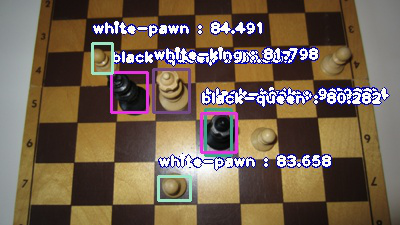

In [29]:
from PIL import Image
Image.open('detected.jpg')

In [32]:
detections = detector.detectObjectsFromImage(minimum_percentage_probability=60,
                                             input_image="../input/chessimg/chess.jfif",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-queen  :  65.03019332885742  :  [81, 79, 116, 154]
white-king  :  69.40692663192749  :  [81, 79, 116, 154]
white-queen  :  68.90878677368164  :  [81, 79, 116, 154]
white-king  :  70.99919319152832  :  [11, 111, 44, 154]
white-knight  :  60.80982685089111  :  [11, 111, 44, 154]


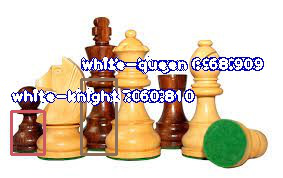

In [33]:
from PIL import Image
Image.open('detected.jpg')

In [42]:
detector.setJsonPath("imageai/data/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="../input/chess-piece-dectection/images/chess13.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-queen  :  83.5249125957489  :  [123, 12, 219, 117]
white-queen  :  80.9488832950592  :  [130, 49, 214, 175]


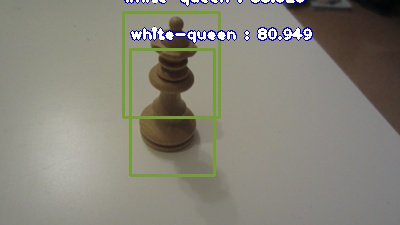

In [43]:
from PIL import Image
Image.open('detected.jpg')

In [52]:
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="../input/chess-piece-dectection/images/chess33.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-king  :  84.91610884666443  :  [87, 37, 198, 155]
white-queen  :  90.78800082206726  :  [87, 37, 198, 155]
black-knight  :  88.22298049926758  :  [198, 1, 321, 197]
black-pawn  :  85.05150079727173  :  [198, 1, 321, 197]
black-queen  :  86.79686188697815  :  [188, 60, 318, 228]


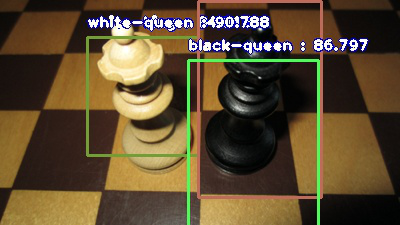

In [53]:
from PIL import Image
Image.open('detected.jpg')

In [65]:
detections = detector.detectObjectsFromImage(minimum_percentage_probability=70,
                                             input_image="../input/chess-piece-dectection/images/chess35.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-king  :  74.35975074768066  :  [179, 82, 219, 129]


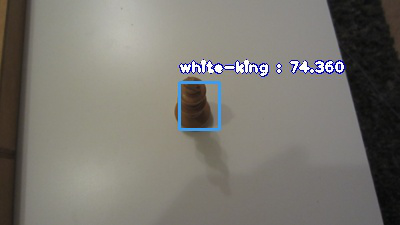

In [66]:
from PIL import Image
Image.open('detected.jpg')

In [23]:
detections = detector.detectObjectsFromImage(minimum_percentage_probability=80,
                                             input_image="../input/chess-piece-dectection/images/chess67.png",
                                             output_image_path="detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

white-queen  :  83.4416151046753  :  [228, 20, 251, 57]
black-bishop  :  85.62564253807068  :  [175, 35, 220, 113]
black-queen  :  83.24071764945984  :  [175, 35, 220, 113]
black-rook  :  81.60926699638367  :  [175, 45, 220, 112]
white-king  :  83.66758823394775  :  [228, 91, 271, 144]
white-king  :  80.70119619369507  :  [40, 151, 76, 179]
white-knight  :  83.03180932998657  :  [40, 151, 76, 179]
white-pawn  :  81.19197487831116  :  [40, 151, 76, 179]
